In [138]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import csv
import os
import sys
import warnings


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, r2_score, mean_absolute_error, mean_squared_error


pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")

warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv('../src/crop_yield_dataset.csv')
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [91]:
df.describe().round()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.0,36520.0,36520.0,36520.0,36520.0,36520.0,36520.0,36520.0,36520.0
mean,7.0,24.0,74.0,10.0,66.0,53.0,42.0,27.0,38.0
std,1.0,9.0,7.0,3.0,11.0,9.0,9.0,26.0,18.0
min,6.0,-4.0,46.0,-3.0,45.0,36.0,27.0,0.0,13.0
25%,6.0,17.0,70.0,8.0,58.0,45.0,35.0,0.0,22.0
50%,6.0,23.0,77.0,10.0,65.0,54.0,42.0,23.0,36.0
75%,7.0,30.0,80.0,12.0,72.0,60.0,50.0,46.0,49.0
max,8.0,54.0,80.0,23.0,91.0,72.0,60.0,137.0,74.0


In [92]:
df.isnull().sum()

Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

In [93]:
df.shape

(36520, 12)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [95]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [96]:
df['Crop_Type'].value_counts()

Crop_Type
Wheat        3652
Corn         3652
Rice         3652
Barley       3652
Soybean      3652
Cotton       3652
Sugarcane    3652
Tomato       3652
Potato       3652
Sunflower    3652
Name: count, dtype: int64

In [97]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          36520 non-null  datetime64[ns]
 1   Crop_Type     36520 non-null  object        
 2   Soil_Type     36520 non-null  object        
 3   Soil_pH       36520 non-null  float64       
 4   Temperature   36520 non-null  float64       
 5   Humidity      36520 non-null  float64       
 6   Wind_Speed    36520 non-null  float64       
 7   N             36520 non-null  float64       
 8   P             36520 non-null  float64       
 9   K             36520 non-null  float64       
 10  Crop_Yield    36520 non-null  float64       
 11  Soil_Quality  36520 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 3.3+ MB


Text(0.5, 1.0, 'Soil Quality Correlation with other column series')

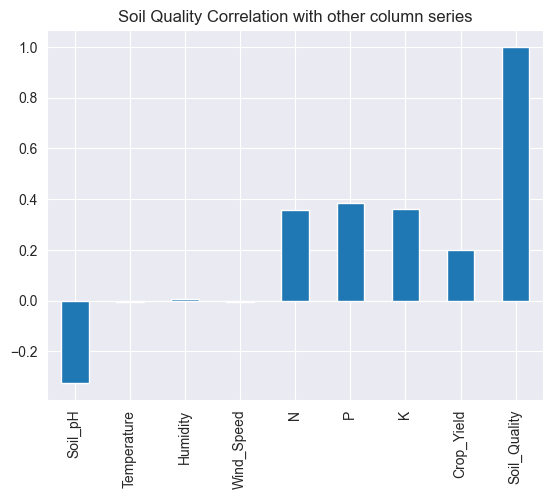

In [98]:
df.select_dtypes(include=["float64"]).corr()["Soil_Quality"].plot(kind="bar")
plt.title("Soil Quality Correlation with other column series")

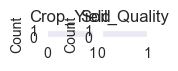

In [99]:

columns_correlation = ["Crop_Yield", "Soil_Quality"]

# Create the subplot
fig, axes = plt.subplots(9, 3, figsize=(2, 1))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through the columns and create plots
for i, col in enumerate(columns_correlation):
    df.select_dtypes(include=["float64"]).corr()[str(col)].plot(kind="bar")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove unused subplots if any
for j in range(len(columns_correlation), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout

# plt.tight_layout()
plt.show()

<Axes: >

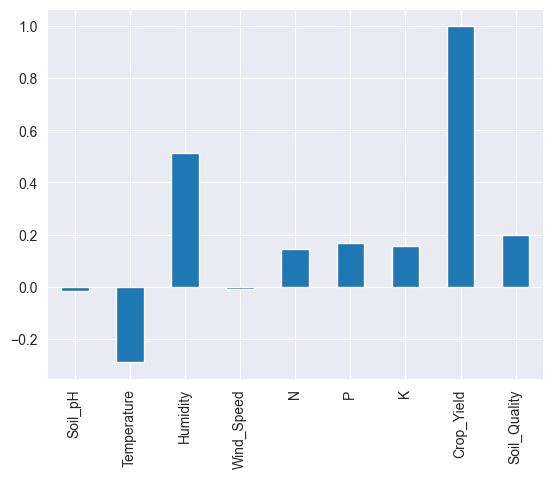

In [100]:
df.select_dtypes(include=["float64"]).corr()["Crop_Yield"].plot(kind="bar")

In [196]:
le = LabelEncoder()
def get_categorical_columns(df):
    category = []
    for i in df.select_dtypes(include=["object"]):
        df[i] = le.fit_transform(df[i])

    plt.figure(figsize=(12, 8))
    heatmap_fig = sb.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="viridis")
    plt.title('Pearsons Correlation of Columns against our target series', fontdict={'size':14})
    plt.savefig('Heatmap Correlation.jpg', format='png', bbox_inches='tight')
    return heatmap_fig
    
        

<Axes: title={'center': 'Pearsons Correlation of Columns against our target series'}>

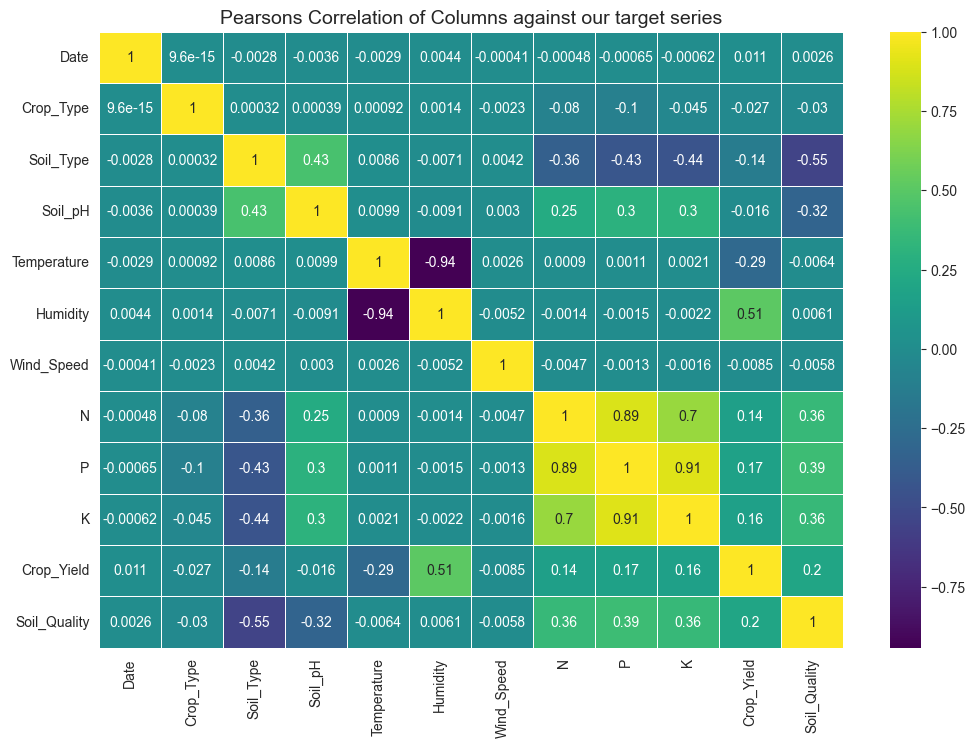

In [197]:
get_categorical_columns(df)

<Axes: >

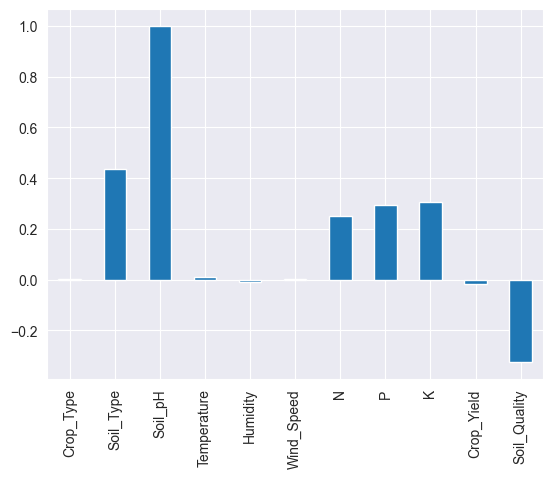

In [103]:
df.select_dtypes(include=["float64", "int64"]).corr()["Soil_pH"].plot(kind="bar")

In [104]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,9,2,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,4,2,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [105]:
x = df.drop(columns=['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'Soil_Quality'])
y = df['Soil_Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape) 

x_train (29216, 4)
x_test (7304, 4)
y_train (29216,)
y_test (7304,)


In [106]:
def test_models(models):
    x = df.drop(columns=['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'Soil_Quality'])
    y = df['Soil_Quality']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

    model = models.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"Regression Report of the {models} model")
    # print('Precision score: ', precision_score(y_pred, y_test))
    print('R2 score: ', r2_score(y_pred, y_test))
    print('Mean Absolute Error: ', mean_absolute_error(y_pred, y_test))
    print('Mean Squared Error score: ', mean_absolute_error(y_pred, y_test)**2)
    print('Mean Squared Error : ', mean_squared_error(y_pred, y_test))
    print("")

In [107]:
models = {
    'linear_reg': LinearRegression(),
    'decision_reg': DecisionTreeRegressor(),
    'random_forest_reg': RandomForestRegressor(),
}

In [108]:
for i in models.values():
    test_models(i)

Regression Report of the LinearRegression() model
R2 score:  -3.8406795729696492
Mean Absolute Error:  14.215758884986034
Mean Squared Error score:  202.08780067605937
Mean Squared Error :  261.3475239717895

Regression Report of the DecisionTreeRegressor() model
R2 score:  1.0
Mean Absolute Error:  1.4308063070720661e-13
Mean Squared Error score:  2.0472066883572038e-26
Mean Squared Error :  4.255246580356985e-26

Regression Report of the RandomForestRegressor() model
R2 score:  1.0
Mean Absolute Error:  3.790931302594661e-14
Mean Squared Error score:  1.4371160140992053e-27
Mean Squared Error :  2.729983631297912e-27



In [109]:
x = df.drop(columns=['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'Soil_Quality'])
y = df['Soil_Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)

print(y_pred)

[59.33333333 60.66666667 13.29166667 ... 49.29166667 15.29166667
 14.58333333]


In [110]:
def manual_testing(data):
    input_data_array = np.asarray(data)
    input_data_array_reshaped = input_data_array.reshape(1, -1)

    rfr.fit(x_train, y_train)
    pred = rfr.predict(input_data_array_reshaped)
    # new_df = pd.DataFrame(data, columns=["N",	"P", "K", "Crop_Yield"])
    # new_df['Soil_Quality'] = pred
    data = input_data_array_reshaped.flatten().tolist()  # Convert the reshaped array to a flat list
    pred.flatten().tolist()
    data.append(float(pred[0]))  # Append the prediction (assuming `pred` is an array or list with one element)
    data = [float(value) for value in data]
    print("Prediction:", pred)
    print("Combined Data:", data)
    return pred, data
        

In [111]:
data = (85.0, 38.0, 68.0, 20.0)

manual_testing(data)

Prediction: [71.06666667]
Combined Data: [85.0, 38.0, 68.0, 20.0, 71.06666666666669]


(array([71.06666667]), [85.0, 38.0, 68.0, 20.0, 71.06666666666669])

In [112]:
x_train

,N,P,K,Crop_Yield
12353,55.0,45.0,35.0,24.745758
13488,55.0,40.0,27.0,35.891246
35370,77.0,60.0,45.0,30.100698
16486,65.0,48.0,36.0,21.903400
31291,72.0,55.0,40.0,0.000000
...,...,...,...,...
16850,60.5,45.0,31.5,0.000000
6265,60.5,49.5,42.0,33.139587
11284,45.0,40.0,33.0,32.032176
860,66.0,50.0,36.0,17.664433


In [113]:
prediction, new_data = manual_testing(data)

Prediction: [71.26666667]
Combined Data: [85.0, 38.0, 68.0, 20.0, 71.26666666666671]


In [114]:
data = (85.0, 38.0, 68.0, 20.0)

In [115]:
new_data

[85.0, 38.0, 68.0, 20.0, 71.26666666666671]

In [116]:
tuple(new_data)

(85.0, 38.0, 68.0, 20.0, 71.26666666666671)

In [117]:
x_train.head()

,N,P,K,Crop_Yield
12353,55.0,45.0,35.0,24.745758
13488,55.0,40.0,27.0,35.891246
35370,77.0,60.0,45.0,30.100698
16486,65.0,48.0,36.0,21.903400
31291,72.0,55.0,40.0,0.000000


In [118]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,9,2,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,4,2,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [119]:
x = df.drop(columns=['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed'])
y = df['Soil_pH']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfr.fit(x_train, y_train)

RandomForestRegressor()

In [120]:
x.head()

,N,P,K,Crop_Yield,Soil_Quality
0,60.5,45.0,31.5,0.000000,22.833333
1,84.0,66.0,50.0,104.871310,66.666667
2,71.5,54.0,38.5,0.000000,27.333333
3,50.0,40.0,30.0,58.939796,35.000000
4,49.5,45.0,38.5,32.970413,22.166667


In [121]:
def manual_testing_for_soil_ph(data):
    input_data_array = np.asarray(data)
    input_data_array_reshaped = input_data_array.reshape(1, -1)

    # rfr.fit(x_train, y_train)
    pred = rfr.predict(input_data_array_reshaped)
    # new_df = pd.DataFrame(data, columns=["N",	"P", "K", "Crop_Yield"])
    # new_df['Soil_Quality'] = pred
    data = input_data_array_reshaped.flatten().tolist()  # Convert the reshaped array to a flat list
    pred.flatten().tolist()
    data.append(float(pred[0]))  # Append the prediction (assuming `pred` is an array or list with one element)
    data = [float(value) for value in data]
    print("Prediction:", pred)
    print("Combined Data:", data)
    return pred, data
        

In [122]:
prediction, new_data = manual_testing_for_soil_ph(new_data)

Prediction: [6.25]
Combined Data: [85.0, 38.0, 68.0, 20.0, 71.26666666666671, 6.25]


In [123]:
new_data

[85.0, 38.0, 68.0, 20.0, 71.26666666666671, 6.25]

In [124]:
x = df.drop(columns=['Date', 'Crop_Type', 'Temperature', 'Humidity', 'Wind_Speed'])
x = x[['N', 'P', 'K', 'Crop_Yield', 'Soil_Quality', 'Soil_pH']]
y = df['Soil_Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [125]:
x.head()

,N,P,K,Crop_Yield,Soil_Quality,Soil_pH
0,60.5,45.0,31.5,0.000000,22.833333,5.50
1,84.0,66.0,50.0,104.871310,66.666667,6.50
2,71.5,54.0,38.5,0.000000,27.333333,5.50
3,50.0,40.0,30.0,58.939796,35.000000,6.75
4,49.5,45.0,38.5,32.970413,22.166667,5.50


In [126]:
def manual_testing_for_soil_type(data):
    data = tuple(data)
    input_data_array = np.asarray(data)
    input_data_array_reshaped = input_data_array.reshape(1, -1)

    # rfr.fit(x_train, y_train)
    pred = rfc.predict(input_data_array_reshaped)
    # new_df = pd.DataFrame(data, columns=["N",	"P", "K", "Crop_Yield"])
    # new_df['Soil_Quality'] = pred
    new_pred_val = pred[0]
    print("Prediction before evaluation: ", new_pred_val)
    print("Rounded pred val: ", new_pred_val.round())

    # new_pred_val = int(new_pred_val.round())
    
    try:
        if new_pred_val == 0:
            print("Soil Type: Clay Soil", pred)
        elif new_pred_val == 1:
            print("Soil Type: Loamy Soil", pred)
        elif new_pred_val == 2:
            print("Soil Type: Peaty Soil", pred)
        elif new_pred_val == 3:
            print("Soil Type: Saline Soil", pred)
        elif new_pred_val == 4:
            print("Soil Type: Sandy Soil", pred)
        else:
            print("Value out of range", pred)
    except ValueError as e:
        print(f"Unexpected Error Occurred: {e}")

    data = input_data_array_reshaped.flatten().tolist()  # Convert the reshaped array to a flat list
    # pred.flatten().tolist()
    data.append(new_pred_val)  # Append the prediction (assuming `pred` is an array or list with one element)
    data = [float(value) for value in data]
        
    print("Prediction:", pred)
    print("Combined Data:", data)
    return pred, data

In [127]:
prediction, new_data = manual_testing_for_soil_type(new_data)

Prediction before evaluation:  1
Rounded pred val:  1
Soil Type: Loamy Soil [1]
Prediction: [1]
Combined Data: [85.0, 38.0, 68.0, 20.0, 71.26666666666671, 6.25, 1.0]


In [128]:
new_data

[85.0, 38.0, 68.0, 20.0, 71.26666666666671, 6.25, 1.0]

In [129]:
x = df.drop(columns=['Date', 'Crop_Type', 'Temperature', 'Humidity', 'Wind_Speed'])
x = x[['N', 'P', 'K', 'Crop_Yield', 'Soil_Quality', 'Soil_pH', 'Soil_Type']]
y = df['Crop_Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [130]:
x.head()

,N,P,K,Crop_Yield,Soil_Quality,Soil_pH,Soil_Type
0,60.5,45.0,31.5,0.000000,22.833333,5.50,2
1,84.0,66.0,50.0,104.871310,66.666667,6.50,1
2,71.5,54.0,38.5,0.000000,27.333333,5.50,2
3,50.0,40.0,30.0,58.939796,35.000000,6.75,4
4,49.5,45.0,38.5,32.970413,22.166667,5.50,2


In [131]:
df['Crop_Type'].value_counts()

Crop_Type
9    3652
1    3652
4    3652
0    3652
5    3652
2    3652
6    3652
8    3652
3    3652
7    3652
Name: count, dtype: int64

In [132]:
def manual_testing_for_crop_type(data):
    data = tuple(data)
    input_data_array = np.asarray(data)
    input_data_array_reshaped = input_data_array.reshape(1, -1)

    # rfr.fit(x_train, y_train)
    pred = rfc.predict(input_data_array_reshaped)
    # new_df = pd.DataFrame(data, columns=["N",	"P", "K", "Crop_Yield"])
    # new_df['Soil_Quality'] = pred
    new_pred_val = pred[0]
    print("Prediction before evaluation: ", new_pred_val)
    print("Rounded pred val: ", new_pred_val.round())

    # new_pred_val = int(new_pred_val.round())
    
    try:
        if new_pred_val == 0:
            print("Crop Type: Barley", pred)
        elif new_pred_val == 1:
            print("Crop Type: Corn", pred)
        elif new_pred_val == 2:
            print("Crop Type: Cotton", pred)
        elif new_pred_val == 3:
            print("Crop Type: Potato", pred)
        elif new_pred_val == 4:
            print("Crop Type: Rice", pred)
        elif new_pred_val == 5:
            print("Crop Type: Soybean", pred)
        elif new_pred_val == 6:
            print("Crop Type: Sugarcane", pred)
        elif new_pred_val == 7:
            print("Crop Type: Sunflower", pred)
        elif new_pred_val == 8:
            print("Crop Type: Tomato", pred)
        elif new_pred_val == 9:
            print("Crop Type: Wheat", pred)
        else:
            print("Value out of range", pred)
    except ValueError as e:
        print(f"Unexpected Error Occurred: {e}")

    data = input_data_array_reshaped.flatten().tolist()  # Convert the reshaped array to a flat list
    # pred.flatten().tolist()
    data.append(new_pred_val)  # Append the prediction (assuming `pred` is an array or list with one element)
    data = [float(value) for value in data]
        
    print("Prediction:", pred)
    print("Combined Data:", data)
    return pred, data

In [133]:
prediction, new_data = manual_testing_for_crop_type(new_data)

Prediction before evaluation:  6
Rounded pred val:  6
Crop Type: Sugarcane [6]
Prediction: [6]
Combined Data: [85.0, 38.0, 68.0, 20.0, 71.26666666666671, 6.25, 1.0, 6.0]


In [134]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,9,2,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,4,2,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [150]:
df['Date'].max()

Timestamp('2023-12-31 00:00:00')

In [151]:
new_df = pd.read_csv('../src/crop_yield_dataset.csv')
new_df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [153]:
x = new_df[['N', 'P', 'K', 'Crop_Yield', 'Soil_Quality', 'Soil_pH', 'Soil_Type']]
y = new_df['Crop_Type']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x['Soil_Type'] = le.fit_transform(x['Soil_Type'])
y_encoded = le.fit_transform(y)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)


logr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logr_model.fit(x_scaled, y_encoded)


LogisticRegression(multi_class='multinomial')

In [156]:
new_data = np.array([[45.0, 40.0, 33.0, 24.03, 34.41, 6.75, 4.0]])

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Predict probabilities
probabilities = logr_model.predict_proba(new_data_scaled)

# Get the recommended crop
recommended_index = np.argmax(probabilities)
recommended_crop = le.inverse_transform([recommended_index])[0]

print(f"Recommended Crop: {recommended_crop}")

Recommended Crop: Soybean


In [175]:
new_data = np.array([[45.0, 40.0, 33.0, 24.08, 34.41, 6.75, 4.0]])

In [176]:
new_data

array([[45.  , 40.  , 33.  , 24.08, 34.41,  6.75,  4.  ]])

In [182]:
probabilities

array([[2.24174058e-04, 4.28887737e-21, 2.22130963e-03, 6.95051387e-09,
        8.56162946e-37, 9.90184933e-01, 3.11386796e-11, 7.36954722e-03,
        2.23059730e-08, 7.17604395e-09]])